# Test of the Ben Sira package
## Import :

In [1]:
from pkg.Variant import VariantsFinder
from pkg.Witness import Witness
from pkg.Stats import *

[nltk_data] Downloading package punkt to /home/mari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/mari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Constantes :

To update depending of the manuscript :

In [2]:
UNWANTED_TAGS = ["folio","verse_nb","line","vacat_car","greek","reconstructed","superscript",\
                    "supralinear","margin_reconstructed","margin_car","margin_infralinear",\
                    "margin_supralinear","Article"]

TO UNDERSTAND THE XML FILES :

                <!ELEMENT folio (#PCDATA)> <!-- shelfmark of the manuscript and folio number -->
                <!ELEMENT verse_nb (#PCDATA)> <!-- verse (children of chapter) -->
                <!ELEMENT line (#PCDATA)> <!-- line on the manuscript -->
                <!ELEMENT vacat_car (#PCDATA)> <!-- a space into the manuscript -->
                <!ELEMENT greek (#PCDATA)> <!-- greek word or letter -->
                <!ELEMENT reconstructed (#PCDATA)> <!-- Hebrew reconstructed -->
                <!ELEMENT superscript (#PCDATA)> <!-- Hebrew superscript letters or words -->
                <!ELEMENT supralinear (#PCDATA)> <!-- Hebrew supralinear letters or words (I think = superscript) -->
                <!ELEMENT margin_reconstructed (#PCDATA)> <!-- marginal notation reconstructed -->
                <!ELEMENT margin_car (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_infralinear (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_supralinear (#PCDATA)> <!-- marginal notation -->

## Exemples :

In [3]:
fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]
folder = "WorkDir/"

First we create a `VariantsFinder` object. At this creation, the object will match all chapters and verses, clean the verses and compute the collations and the distances for each verses :

In [4]:
vf = VariantsFinder(fileNames, UNWANTED_TAGS, folder = folder)

# Matching Done
## Cleaning Done
### Collation Done
#### Distance Done
##### Errors Classification Done


We give a random exemple. It is important to note that the representation use here is simple_SVG, the normal SVG generating a lot of unwanted errors.

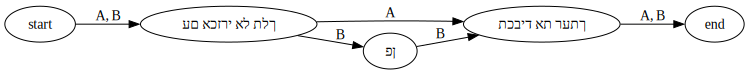

In [5]:
vf.getSampleVariant()

The following exemple will run on the first witness, to test the different representation.

In [6]:
test = vf.witnesses[1]
print(test)

Verse 20 : aligned
+---+---+-------------------------------+-----------+
| A |   | בין אחים ראשם נכבד וירא אלהים | בעינ      |
| B | - | בין אחים ראשם נכבד וירא אלהים | נכבד ממנו |
+---+---+-------------------------------+-----------+


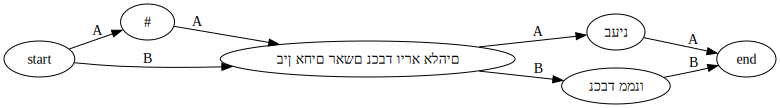

In [7]:
test.getSVG()

In [8]:
test.getHTML()

A,,בין אחים ראשם נכבד וירא אלהים,בעינ
B,-,בין אחים ראשם נכבד וירא אלהים,נכבד ממנו


In [9]:
print(test.getCSV())

A, ,בין אחים ראשם נכבד וירא אלהים ,בעינ
B,,בין אחים ראשם נכבד וירא אלהים ,נכבד ממנו



The following exemple show the DataFrame of the `VariantsFinder` object.

In [10]:
df = vf.getDF()
df

,Verse A,Verse B,Variant A,Variant B,Manuscript A,Manuscript B,Chapter A,Chapter B,Verse,Levenshtein,Hamming,Inversion,Difference
0,עבד משכיל הורם ועבד ש לﬡ יתאונן,עבד משכיל חביב כנפש,"[, הורם, ועבד, ש, לﬡ, יתאונן]","[חביב, כנפש]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,25,15,17,None,עבד\n משכיל\n+ חביב\n+ כנפש\n- הורם\n- ועבד...
1,בין אחים ראשם נכבד וירא אלהים בעינ,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,"[, בעינ]","[נכבד, ממנו]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,20,6,8,None,בין\n אחים\n ראשם\n נכבד\n וירא\n אלהים...
2,אין לבזות דל משכיל ואין לכבד כל איש כם,אין לבזות דל משכיל ואין לכבד כל איש חמס,"[, כם]",[חמס],ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,23,3,3,None,אין\n לבזות\n דל\n משכיל\n ואין\n לכבד\...
3,אַל תתחכם לעבד חפצך ואל תתכעת צרכך,אל תתחכם לעשות חפצך ואל תתכב,"[, א, ַ, ל, לעבד, תתכעת, צרכך]","[אל, לעשות, תתכב]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,26,8,11,None,- אַל\n? -\n\n+ אל\n תתחכם\n- לעבד\n+ לעשות\...
4,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,"[, נכבד]","[הנכבד, בעיניו, בעשרו]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,31,12,16,None,- נכבד\n+ הנכבד\n? +\n\n+ בעיניו\n בעשרו\n א...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,ל לב נבל ואופן חוזר מחשבותיו,גלגל קל לב נבל ואופן חוזר מחשבותיו,[ל],"[גלגל, קל]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,5,5,6,None,- ל\n+ גלגל\n+ קל\n לב\n נבל\n ואופן\n חוז...
149,שונא תורה ומתמוטט כמסערה,לא יחכם שונא תורה ומתמוטט כמסערה,[],"[לא, יחכם]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,2,6,6,None,+ לא\n+ יחכם\n שונא\n תורה\n ומתמוטט\n כמסערה
150,ם יום כי כלו אור שנה על שמש,מה על יום יום כי כלו אור שונה על שמש,"[ם, שנה]","[מה, על, יום, שונה]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,7,7,11,None,- ם\n+ מה\n+ על\n+ יום\n יום\n כי\n כלו\n ...
151,אוהב שונא תחת כל יצהל,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,[],"[כסוס, מוכן, אוהב]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,6,12,12,None,+ כסוס\n+ מוכן\n אוהב\n שונא\n תחת\n כל\n+...


Finally, here is an exemple of the mardown and csv export. By default, the variants are saved under the files `"Variants.md"` and `"Variants.csv"`.

In [11]:
vf.getCSV()
vf.getMarkdown()

## Statistiques :

In [12]:
print(inversion(df))
print(no_variation_per(df))

Inversion
exact match    4
Percent of exact matches in the ms_a_new.xml compared to other manuscripts = 0.0
Percent of exact matches in the ms_b_new.xml compared to other manuscripts = 3.076923076923077
Percent of exact matches in the ms_e_new.xml compared to other manuscripts = 0.0

